In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import joblib



In [ ]:
df.head(9)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,0,-1.277445,0,1,-1.160323,-0.992611,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0.066327,1,0,-0.259629,-0.172165,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,-1.236724,1,1,-0.362660,-0.958066,1,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0.514251,0,0,-0.746535,-0.193672,1,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,-1.236724,1,1,0.197365,-0.938874,0,0,...,0,0,0,0,0,0,0,1,0,1
5,0,0,0,-0.992402,1,1,1.159546,-0.643789,0,0,...,0,1,0,1,0,0,0,1,0,1
6,0,0,1,-0.422317,1,1,0.808907,-0.145738,1,0,...,0,1,0,0,0,0,1,0,0,0
7,0,0,0,-0.910961,0,0,-1.163647,-0.872587,0,1,...,0,0,0,0,0,0,0,0,1,0
8,0,1,0,-0.177995,1,1,1.330711,0.338085,0,0,...,0,1,0,1,0,0,0,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   float64
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   float64
 8   gender_Male                            7043 non-null   int64  
 9   MultipleLines_No phone service         7043 non-null   int64  
 10  MultipleLines_Yes                      7043 non-null   int64  
 11  Inte

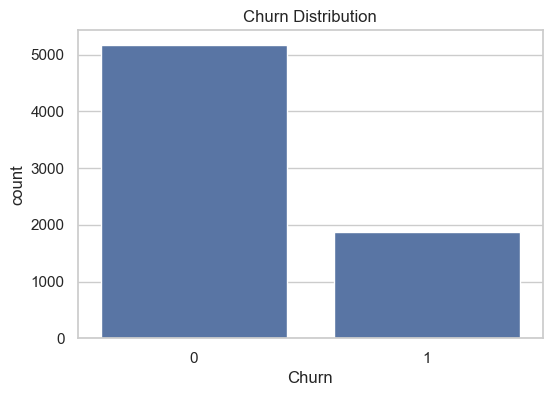

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

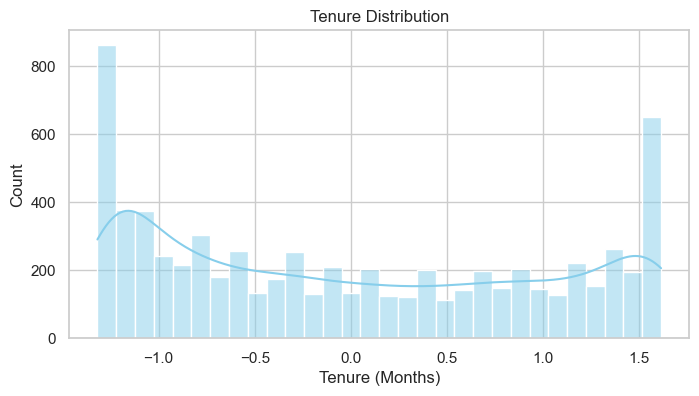

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['tenure'], bins=30, kde=True, color='skyblue')
plt.title("Tenure Distribution")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()


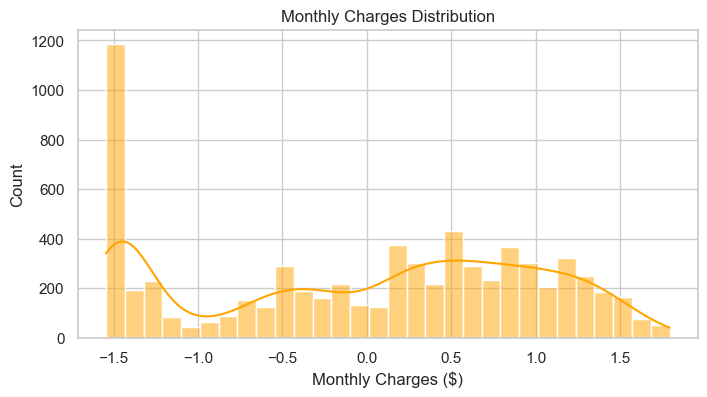

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='orange')
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Count")
plt.show()


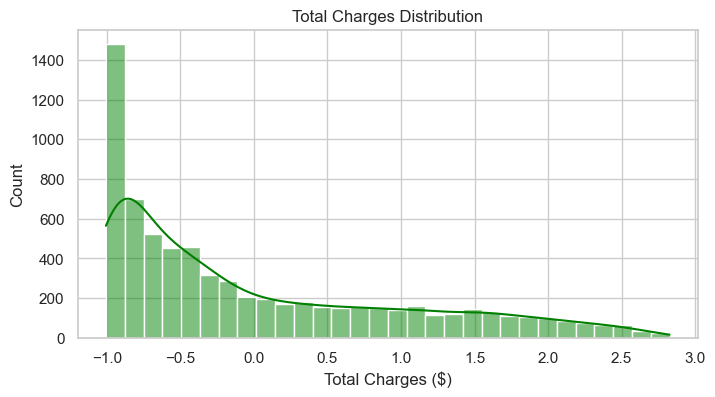

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['TotalCharges'], bins=30, kde=True, color='green')
plt.title("Total Charges Distribution")
plt.xlabel("Total Charges ($)")
plt.ylabel("Count")
plt.show()


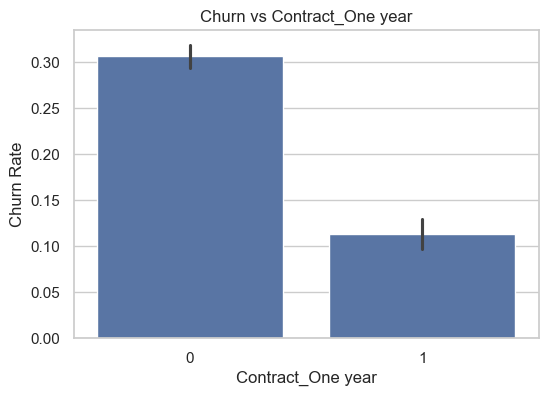

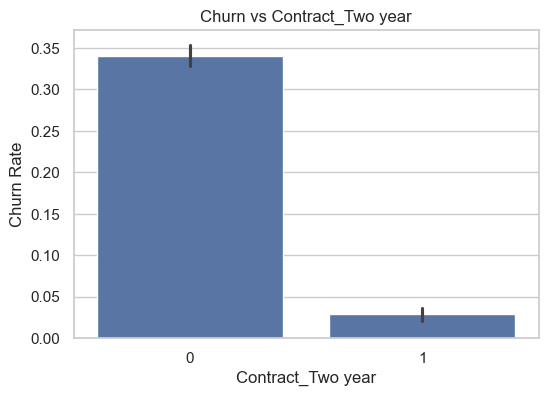

In [ ]:
contract_cols = ['Contract_One year', 'Contract_Two year']

for col in contract_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=df[col], y=df['Churn'])
    plt.title(f"Churn vs {col}")
    plt.ylabel("Churn Rate")
    plt.show()


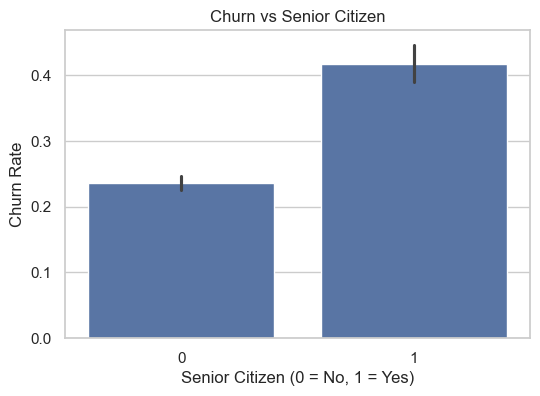

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='SeniorCitizen', y='Churn', data=df)
plt.title("Churn vs Senior Citizen")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate")
plt.show()


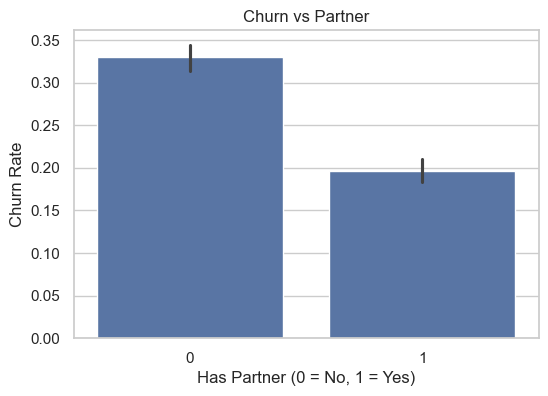

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Partner', y='Churn', data=df)
plt.title("Churn vs Partner")
plt.xlabel("Has Partner (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate")
plt.show()


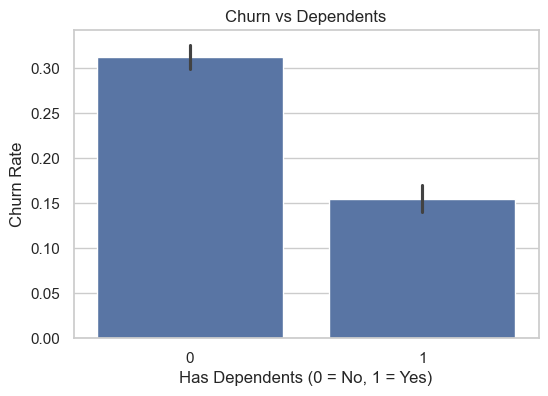

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Dependents', y='Churn', data=df)
plt.title("Churn vs Dependents")
plt.xlabel("Has Dependents (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate")
plt.show()


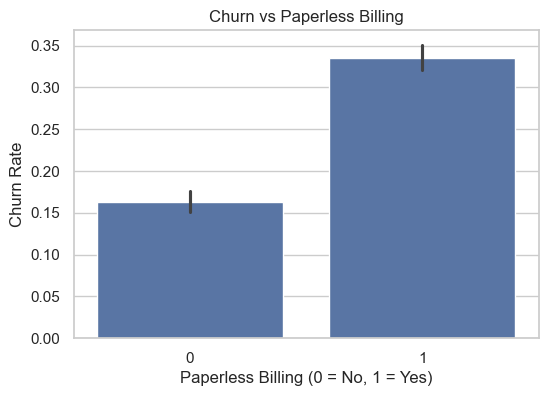

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='PaperlessBilling', y='Churn', data=df)
plt.title("Churn vs Paperless Billing")
plt.xlabel("Paperless Billing (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate")
plt.show()


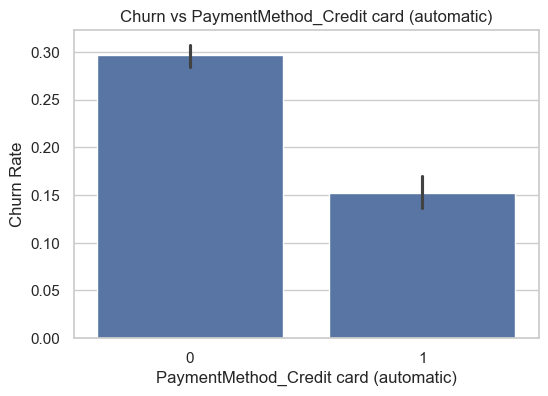

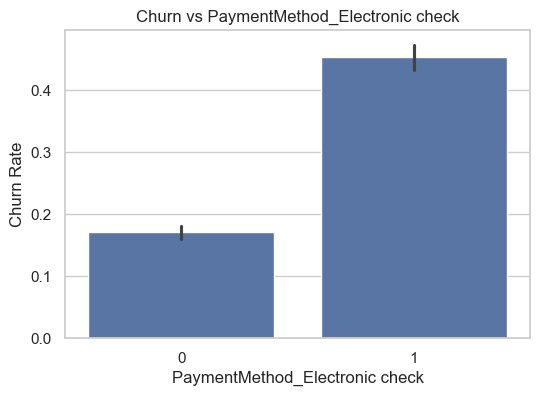

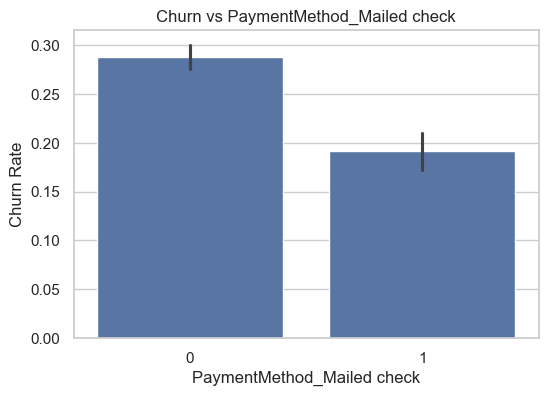

In [ ]:
payment_cols = [
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check'
]

for col in payment_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=df[col], y=df['Churn'])
    plt.title(f"Churn vs {col}")
    plt.ylabel("Churn Rate")
    plt.show()


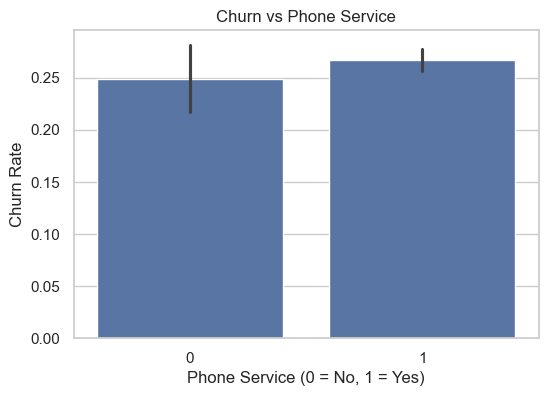

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='PhoneService', y='Churn', data=df)
plt.title("Churn vs Phone Service")
plt.xlabel("Phone Service (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate")
plt.show()


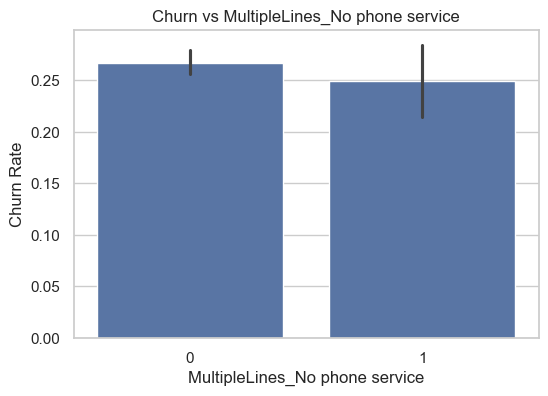

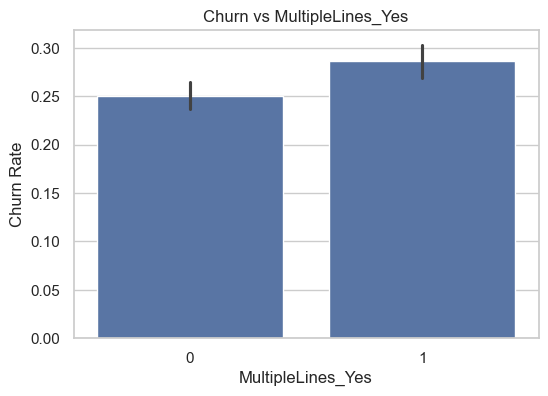

In [ ]:
multi_cols = [
    'MultipleLines_No phone service',
    'MultipleLines_Yes'
]

for col in multi_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=df[col], y=df['Churn'])
    plt.title(f"Churn vs {col}")
    plt.ylabel("Churn Rate")
    plt.show()


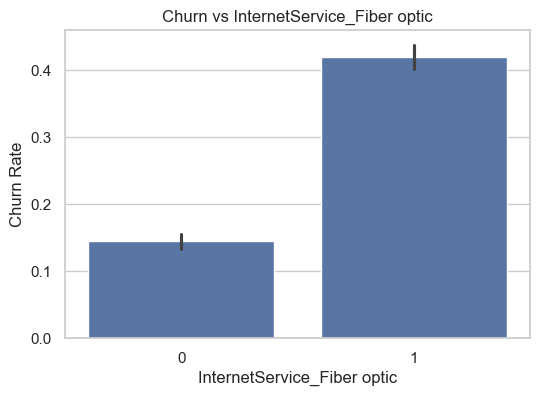

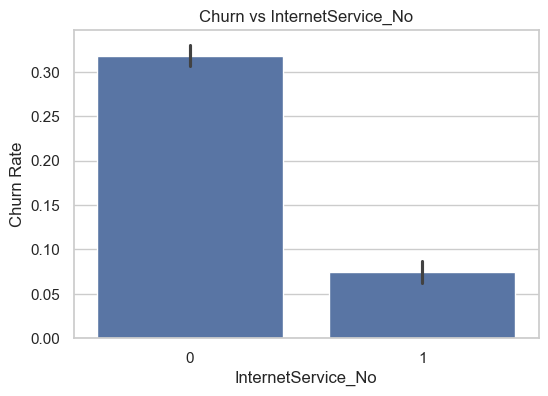

In [ ]:
internet_cols = [
    'InternetService_Fiber optic',
    'InternetService_No'
]

for col in internet_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=df[col], y=df['Churn'])
    plt.title(f"Churn vs {col}")
    plt.ylabel("Churn Rate")
    plt.show()


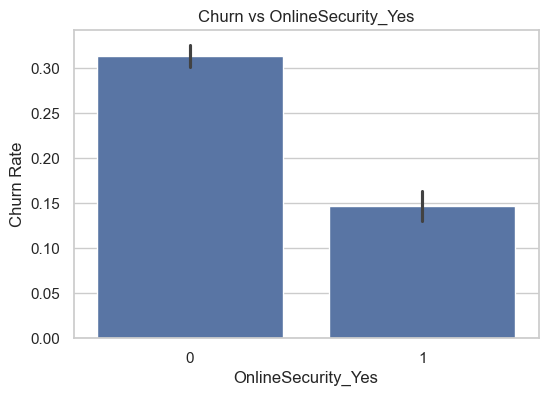

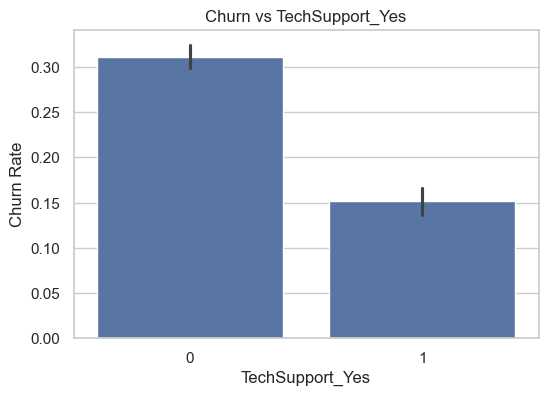

In [ ]:
service_cols = [
    'OnlineSecurity_Yes',
    'TechSupport_Yes'
]

for col in service_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=df[col], y=df['Churn'])
    plt.title(f"Churn vs {col}")
    plt.ylabel("Churn Rate")
    plt.show()


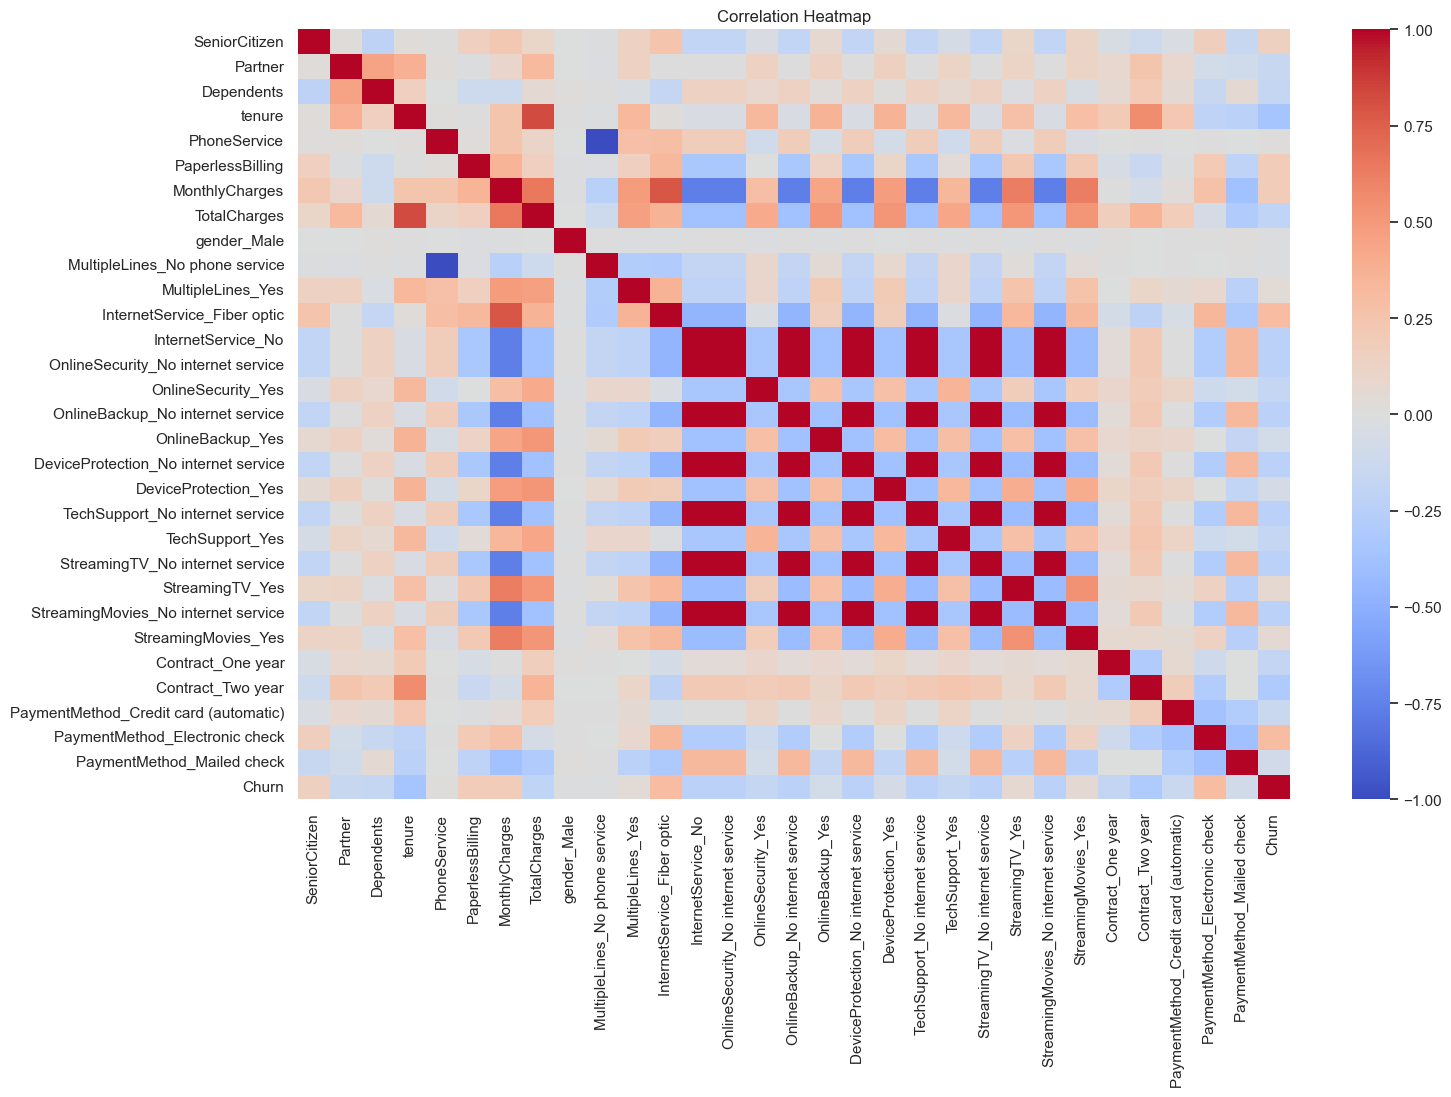

In [ ]:
plt.figure(figsize=(16,10))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


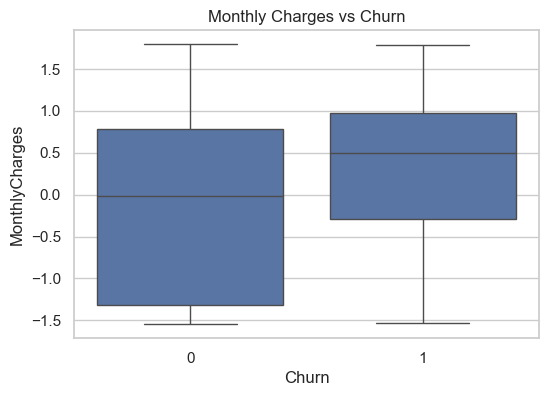

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


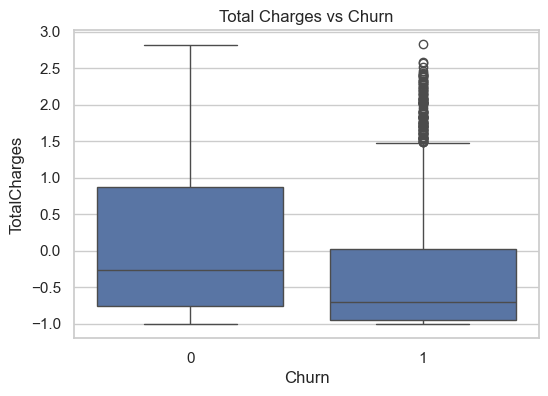

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges vs Churn")
plt.show()


In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



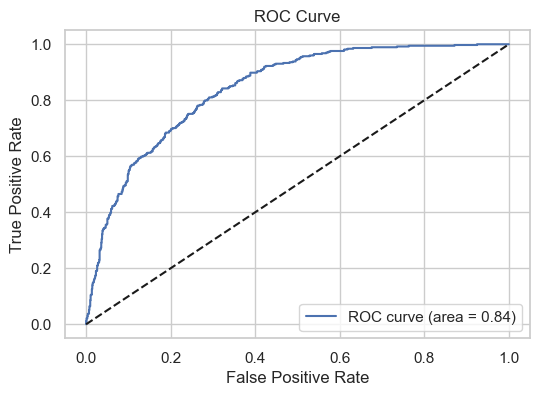

In [ ]:
y_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


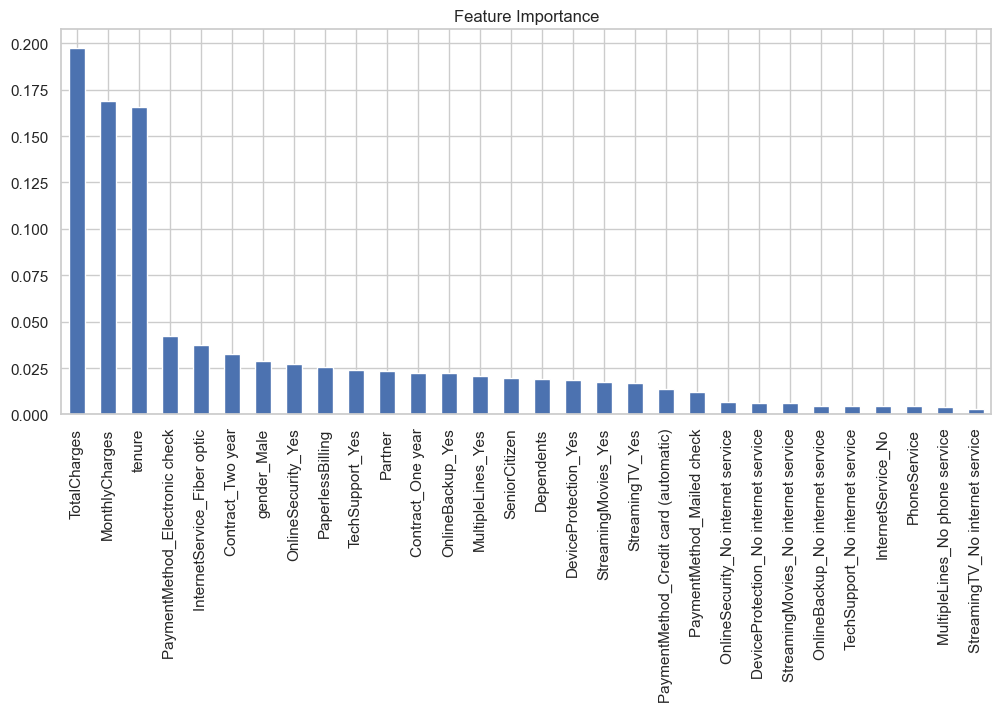

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind='bar', figsize=(12,5))
plt.title("Feature Importance")
plt.show()

In [ ]:

joblib.dump(rf, 'churn_model.pkl')


['churn_model.pkl']